In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment, Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import run_all_starts_test
from olfactory_navigation.agents.model_based_util.environment_converter import minimal_converter

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

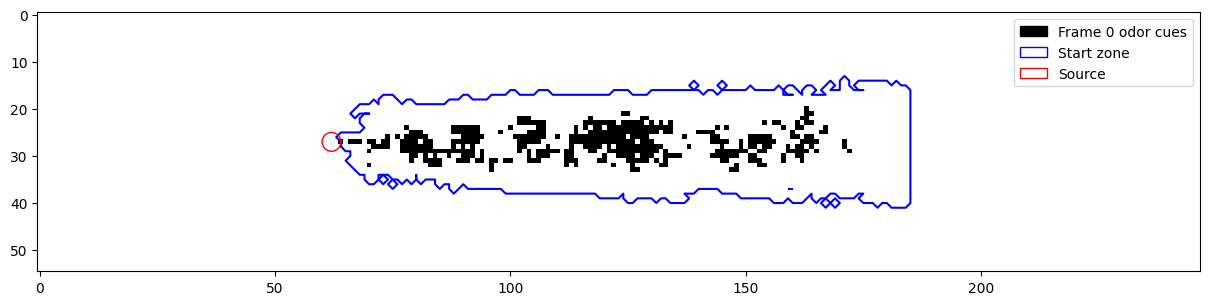

In [3]:
# data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='stop',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [4]:
ag = FSVI_Agent(env, environment_converter=minimal_converter, partitions=[3,3])

In [5]:
_ = ag.train(expansions=1000, use_gpu=True)

[07/23/2024, 17:53:59] MDP_policy, not provided. Solving MDP with Value Iteration...
[07/23/2024, 17:53:59] Sending Model to GPU...
[07/23/2024, 17:53:59]     > Done in 0.323s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 26-state, 4-action
  - Converged in 918 iterations and 5.5180 seconds
  - Took on average 0.0060s per iteration


Expansions:   0%|          | 0/1000 [00:00<?, ?it/s]

Converged!
Summary of Point Based Value Iteration run
  - Model: 26 state, 4 action, 3 observations
  - Converged or stopped after 933 expansion steps and 933 backup steps.
  - Resulting value function has 4106 alpha vectors.
  - Converged in 79.1093s

  - Expand function took on average 0.0622s and yielded on average 551.37 beliefs per iteration. (0.0010s/it/belief)
  - Backup function took on average 0.0225s and yielded on average 4.40 alpha vectors per iteration. (0.0006s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


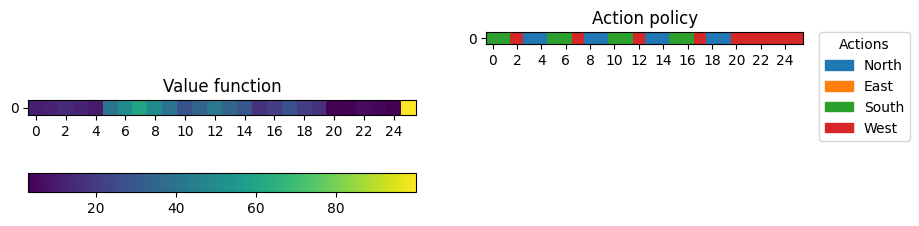

In [6]:
ag.value_function.plot()

In [7]:
hist = run_all_starts_test(ag, use_gpu=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 26.213s:
Simulations reached goal: 1864/2393 (529 failures (reached horizon: 529)) (77.89% success)
 - Average step count:                 299.455 +- 377.27 (Successfull only: 100.642 +- 62.64)
 - Extra steps:                        228.422 +- 373.65 (Successful only: 30.135 +- 34.89)
 - Average discounted rewards (ADR):   0.335 +- 0.27 (Successfull only: 0.431 +- 0.22)
 - Tmin/T:                             0.610 +- 0.34 (Successful only: 0.762 +- 0.21)


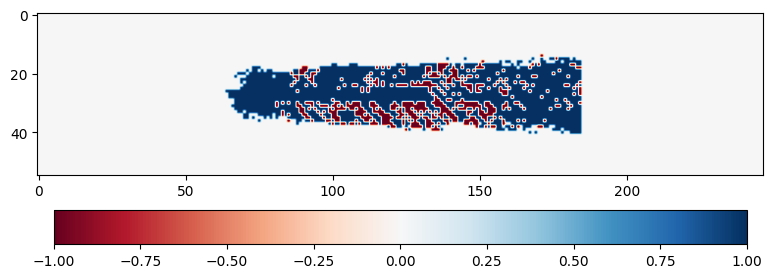

In [8]:
start_points_grid = np.zeros(env.shape)

failed_points = hist.start_points[hist.done_at_step == -1]
success_points = hist.start_points[hist.done_at_step != -1]

start_points_grid[failed_points[:,0], failed_points[:,1]] = -1
start_points_grid[success_points[:,0], success_points[:,1]] = 1

plt.figure(figsize=(10,3))
plt.imshow(start_points_grid, cmap='RdBu')
plt.colorbar(orientation='horizontal')

In [1]:
# ag.initialize_state(1)

# belief = ag.belief.belief_list[0]
# for i, (a, o, pos) in enumerate(zip(hist.actions, hist.observations, hist.positions)):
#     if np.all(a == -1):
#         break

#     a = a[0]
#     if a[0] == 1:
#         a = 2
#     elif a[0] == -1:
#         a = 0
#     elif a[1] == 1:
#         a = 1
#     else:
#         a = 3

#     o = int(o[0] > ag.threshold)

#     new_belief = belief.update(a,o)

#     belief = new_belief

#     #plot
#     plt.title(f'Step {i} - action {a}, obs {o}, pos {[str(posi) for posi in pos[0]]}')
#     plt.imshow(belief.values[:-1].reshape((4,4)).T, cmap='Blues')
#     plt.gca().invert_yaxis()
#     plt.colorbar()
#     plt.show()

#     # i += 1
#     if i == 100:
#         break

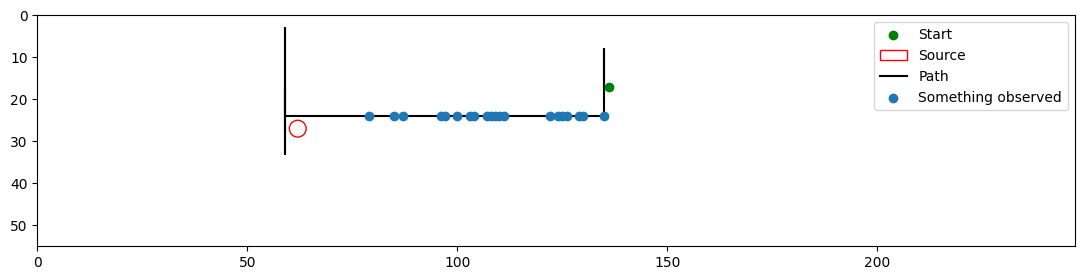

In [16]:
hist.plot(45)

In [11]:
np.where(hist.done_at_step == -1)[0][:10]

array([ 0,  7, 13, 37, 45, 46, 47, 48, 57, 67], dtype=int64)

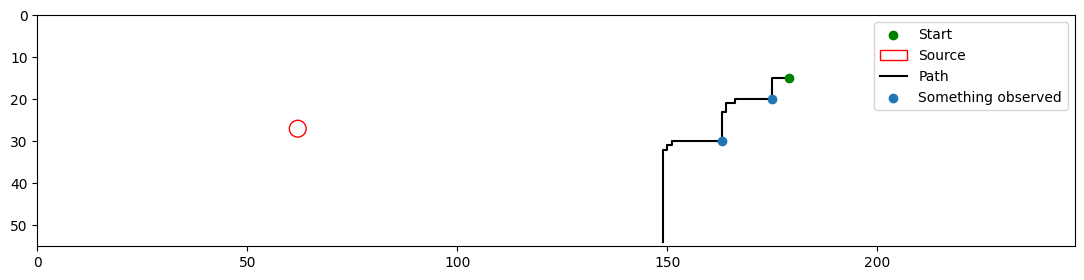

In [21]:
hist.plot(10)